In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import  classification_report,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read dataset csv with ; seperator
df = pd.read_csv ('clinical_dataset.csv',sep=';')

In [3]:
# Preprocessing of the clinical dataset
# Convert nominal features to numerical
df['fried'].replace(['Non frail','Pre-frail','Frail'],[0,1,2],inplace=True)
df['gender'].replace(['F','M'],[0,1],inplace=True)
df['ortho_hypotension'].replace(['No','Yes'],[0,1],inplace=True)
df['vision'].replace(['Sees poorly','Sees moderately','Sees well'],[0,1,2],inplace=True)
df['audition'].replace(['Hears poorly','Hears moderately','Hears well'],[0,1,2],inplace=True)
df['weight_loss'].replace(['No','Yes'],[0,1],inplace=True)
df['balance_single'].replace(['<5 sec','>5 sec'],[0,1],inplace=True)
df['gait_optional_binary'] = df['gait_optional_binary'].astype(int)
df['gait_speed_slower'].replace(['No','Yes'],[0,1],inplace=True)
df['grip_strength_abnormal'].replace(['No','Yes'],[0,1],inplace=True)
df['low_physical_activity'].replace(['No','Yes'],[0,1],inplace=True)
df['memory_complain'].replace(['No','Yes'],[0,1],inplace=True)
df['sleep'].replace(['No sleep problem','Occasional sleep problem','Permanent sleep problem'],[0,1,2],inplace=True)
df['living_alone'].replace(['No','Yes'],[0,1],inplace=True)
df['leisure_club'].replace(['No','Yes'],[0,1],inplace=True)
df['house_suitable_participant'].replace(['No','Yes'],[0,1],inplace=True)
df['house_suitable_professional'].replace(['No','Yes'],[0,1],inplace=True)
df['health_rate'].replace(['1 - Very bad','2 - Bad','3 - Medium','4 - Good','5 - Excellent'],[0,1,2,3,4],inplace=True)
df['health_rate_comparison'].replace(['1 - A lot worse','2 - A little worse','3 - About the same','4 - A little better','5 - A lot better'],[0,1,2,3,4],inplace=True)
df['activity_regular'].replace(['No','< 2 h per week','> 2 h and < 5 h per week','> 5 h per week'],[0,1,2,3],inplace=True)
df['smoking'].replace(['Never smoked','Past smoker (stopped at least 6 months)','Current smoker'],[0,1,2],inplace=True)


In [4]:
# Remove erroneous values
missing_values=[999,'test non realizable','Test not adequate']
df.replace(missing_values,'',inplace=True)

In [5]:
# Handle missing values
# Replace empty values with NaN object
df.replace('', np.nan, inplace=True)
# Remove entries with missing values in some features
df.dropna(inplace=True)

In [6]:
# Classification with KNN
# Drop fried and 5 parameters used for generating the fried categorization
X = df.drop(columns=['fried','weight_loss','exhaustion_score','gait_speed_slower','grip_strength_abnormal','low_physical_activity'])

In [7]:
# Assign fried column to y
y = df['fried'].values

In [8]:
# Split dataset to train and test sets with 20% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
start = time.time()

In [9]:
#classsification with random forest
clf=RandomForestClassifier(n_estimators=25,random_state=1)

In [10]:
#Fit the random forest classifier from the training dataset
clf.fit(X_train,y_train)

SyntaxError: invalid syntax (46917801.py, line 2)

In [11]:
# Make the prediction
y_pred = knn.predict(X_test)

In [12]:
accuracy = float("{:.2f}".format(metrics.accuracy_score(y_test, y_pred) * 100))
print("KNN Accuracy:",accuracy, "%")
end = time.time()
print(end - start, "seconds")
start = time.time()

KNN Accuracy: 65.38 %
60.831995487213135 seconds


In [13]:
print("DT precision, recall, f1-score, support score:\n")
print(classification_report(y_test, y_pred))

DT precision, recall, f1-score, support score:

              precision    recall  f1-score   support

           0       0.62      0.89      0.74        28
           1       0.75      0.39      0.51        23
           2       0.00      0.00      0.00         1

    accuracy                           0.65        52
   macro avg       0.46      0.43      0.42        52
weighted avg       0.67      0.65      0.62        52



D:\Users\debna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\debna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\debna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
confmat = confusion_matrix(y_test, knn.predict(X_test))
print(confmat)

[[25  3  0]
 [14  9  0]
 [ 1  0  0]]


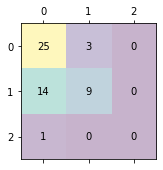

In [16]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')